In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Kaggle datasets

In this notebook we are going to discuss the collection of dataset available on the kaggle platform.

The data is published under the CC0 license on [this kaggle page](https://www.kaggle.com/canggih/voted-kaggle-dataset) and we have adapted it for classes.

Let's get familiar with the content of the notebook and follow the instructions to prepare the data that we are going to need during classes.

**Note!** When you come back to the document later, remember to re-run the code cells.

### Dataset contents

The dataset contains information on:

*   **Title** - name of the dataset,
*   **Data Type** - format that the data is published in,
*   **License** - type of license regulating the use of the set,
*   **Votes** - number of votes for the set,
*   **Views** - number of views of the set,
*   **Downloads** - number of downloads of the set,
*   **Kernels** - number of kernels based on the set,
*   **Topics** - number of topics.







In [126]:
kaggle = pd.read_csv('./Preparation of the dataset/Kaggle Datasets/kaggle-ds.csv')
kaggle

,Title,Data Type,License,Votes,Views,Downloads,Kernels,Topics
0,Credit Card Fraud Detection,CSV,ODbL,1241,442136.0,53128.0,1782.0,26.0
1,European Soccer Database,SQLite,ODbL,1046,396214.0,46367.0,1459.0,75.0
2,TMDB 5000 Movie Dataset,CSV,Other,1024,446255.0,62002.0,1394.0,46.0
3,Global Terrorism Database,CSV,Other,789,187877.0,26309.0,608.0,11.0
4,Bitcoin Historical Data,CSV,CC4,618,146734.0,16868.0,68.0,13.0
...,...,...,...,...,...,...,...,...
2145,Fortnite: Battle Royale Chest Location Coordin...,CSV,Other,2,369.0,16.0,NaN,0.0
2146,Titanic: Passenger Nationalities,CSV,Other,2,75.0,10.0,NaN,0.0
2147,Stemmed and Lementized English words,{}JSON,ODbL,2,70.0,11.0,NaN,0.0
2148,Los Angeles Weather During 2014,CSV,CC0,2,78.0,5.0,NaN,0.0


## Notebook preparation

### Checking data types

In [127]:
kaggle.dtypes

Title         object
Data Type     object
License       object
Votes          int64
Views        float64
Downloads    float64
Kernels      float64
Topics       float64
dtype: object

In [128]:
"complete records: " + str(len(kaggle.dropna(how="any"))) + "; total records: " + str(len(kaggle))

'complete records: 845; total records: 2150'

## Dataset type conversion

In [129]:
kaggle["Data Type"].value_counts()

Data Type
CSV         1593
Other        468
{}JSON        56
SQLite        25
BigQuery       8
Name: count, dtype: int64

In [130]:
kaggle["Data Type"] = kaggle["Data Type"].astype("category")

### Converting licenses to categories

In [131]:
kaggle["License"].value_counts()

License
CC0      845
Other    751
CC4      324
ODbL     181
GPL       26
CC3       23
Name: count, dtype: int64

In [132]:
kaggle["License"] = kaggle["License"].astype("category")

### Numeric variables analysis

In [133]:
kaggle.describe()

,Votes,Views,Downloads,Kernels,Topics
count,2150.000000,2145.000000,2135.000000,1206.000000,1558.000000
mean,24.011628,7299.300699,923.793443,38.392206,1.261874
std,64.788465,22660.139843,3098.584600,147.499168,3.589140
min,2.000000,29.000000,0.000000,2.000000,0.000000
25%,4.000000,750.000000,60.000000,3.000000,0.000000
50%,8.000000,1930.000000,187.000000,7.000000,0.000000
75%,19.000000,5151.000000,602.000000,21.000000,2.000000
max,1241.000000,446255.000000,62002.000000,3394.000000,75.000000


## Exercises

**Exercise 1**

In [134]:
sns.set_theme(
    style="darkgrid",
    context="notebook",
    palette="Set2",
    )

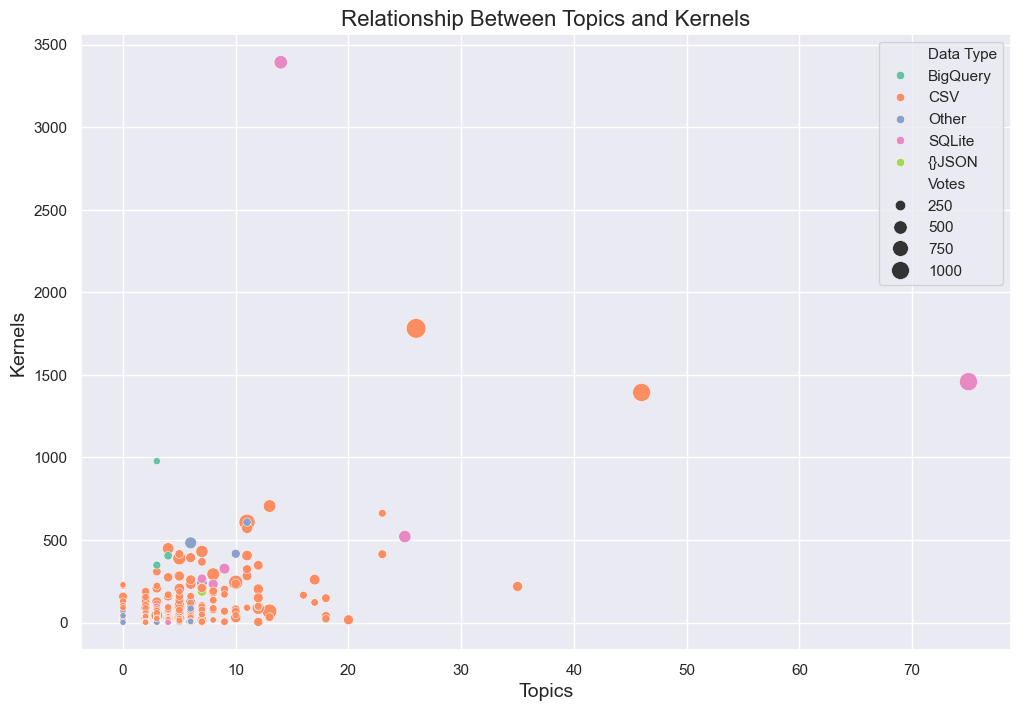

In [135]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=kaggle,
    x="Topics", 
    y="Kernels", 
    hue="Data Type",
    size="Votes",   
    sizes=(20, 200),
)

# Přidání popisů
plt.title("Relationship Between Topics and Kernels", fontsize=16)
plt.xlabel("Topics", fontsize=14)
plt.ylabel("Kernels", fontsize=14)
plt.show()

**Exercise 2**

In [136]:
sns.set_theme(
    style="whitegrid",
    context="notebook",
    palette="Paired",
    )

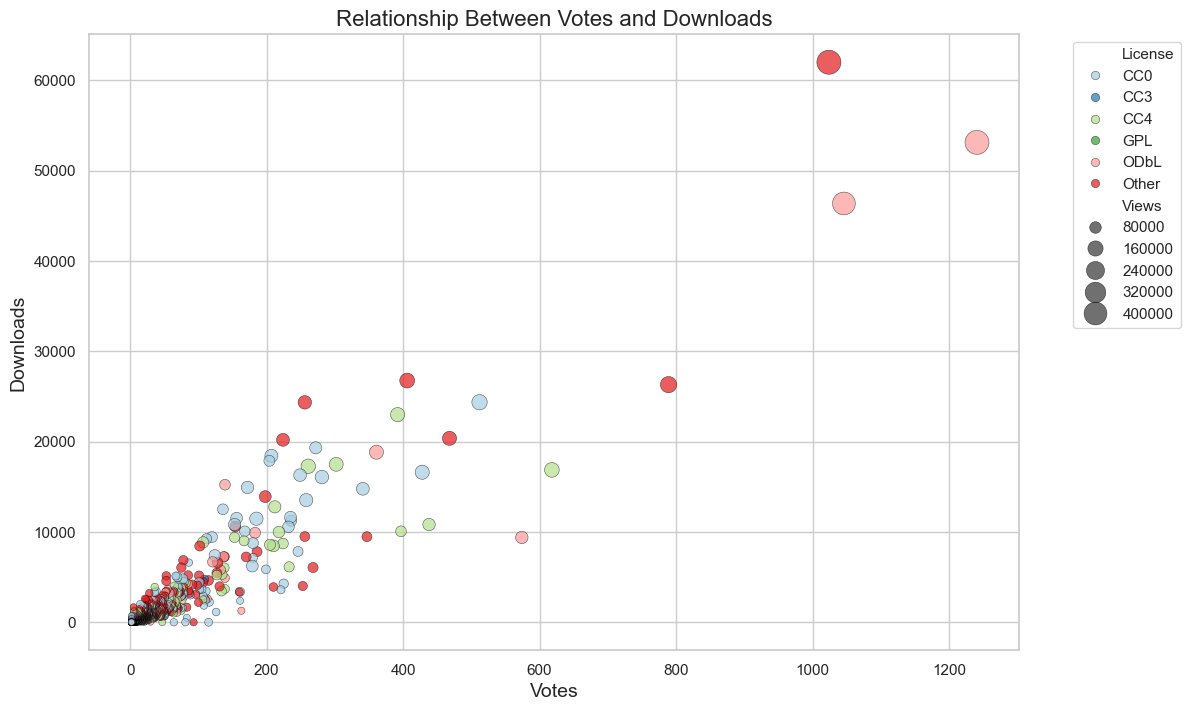

In [137]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=kaggle,
    x="Votes", 
    y="Downloads", 
    hue="License",
    size="Views",
    sizes=(20, 300),
    alpha=0.7,
    edgecolor="black"
)

plt.title("Relationship Between Votes and Downloads", fontsize=16)
plt.xlabel("Votes", fontsize=14)
plt.ylabel("Downloads", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

**Exercise 3**

In [138]:
data_type_counts = kaggle['Data Type'].value_counts().sort_values(ascending=False)

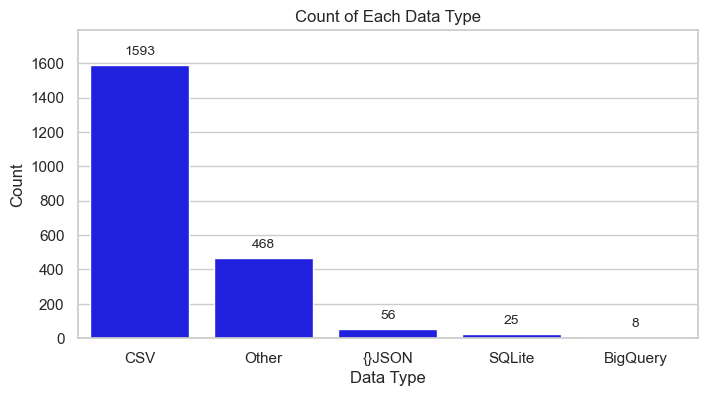

In [139]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    x=data_type_counts.index,
    y=data_type_counts.values,
    order=data_type_counts.index,
    color="blue"
)

ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=5, fontsize=10)

plt.ylim(0, data_type_counts.max() + 200) 

plt.title("Count of Each Data Type")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.show()

In [140]:
license_counts = kaggle['License'].value_counts().sort_values(ascending=False)

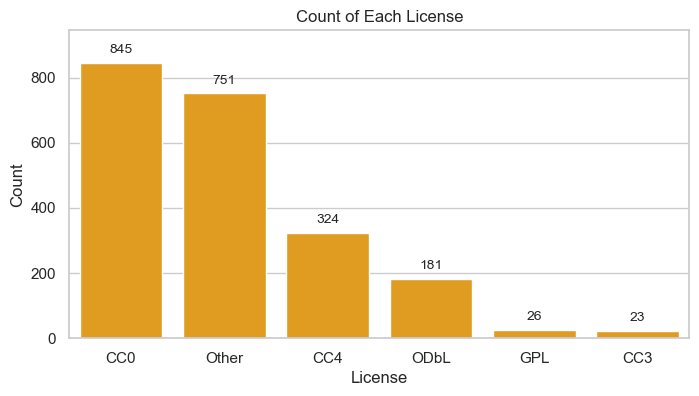

In [141]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    x=license_counts.index,
    y=license_counts.values,
    order=license_counts.index,
    color="orange"
)

ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=5, fontsize=10)

plt.ylim(0, license_counts.max() + 100)

plt.title("Count of Each License")
plt.xlabel("License")
plt.ylabel("Count")
plt.show()

**Exercise 4**

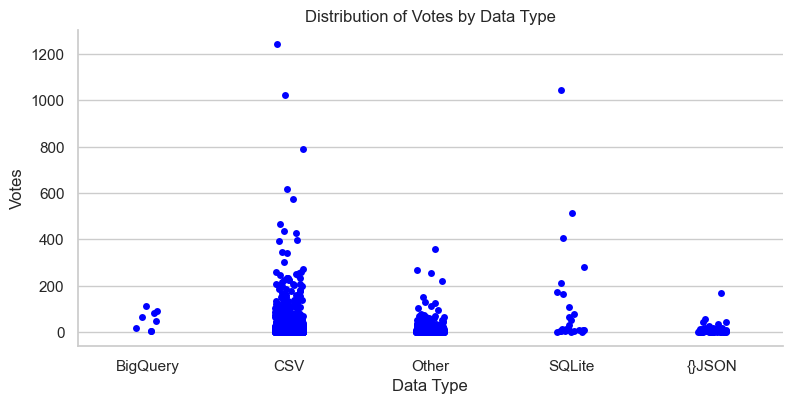

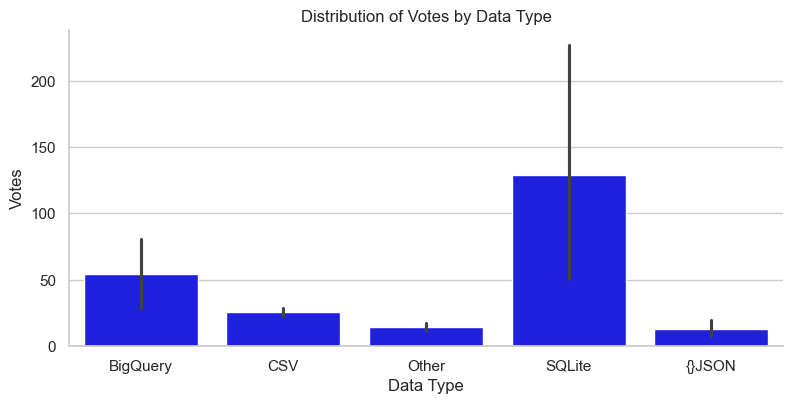

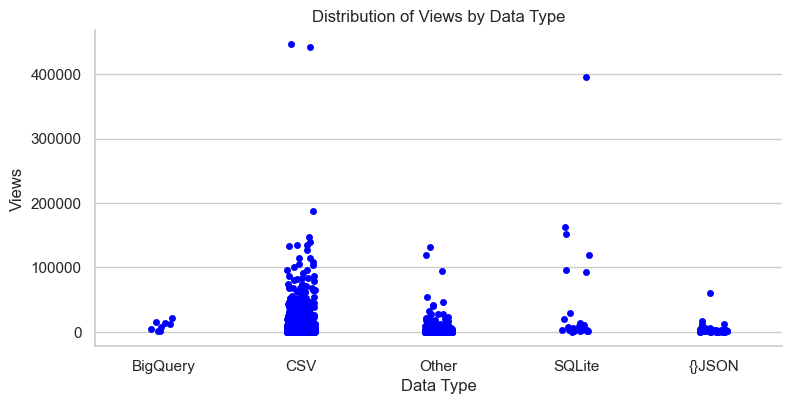

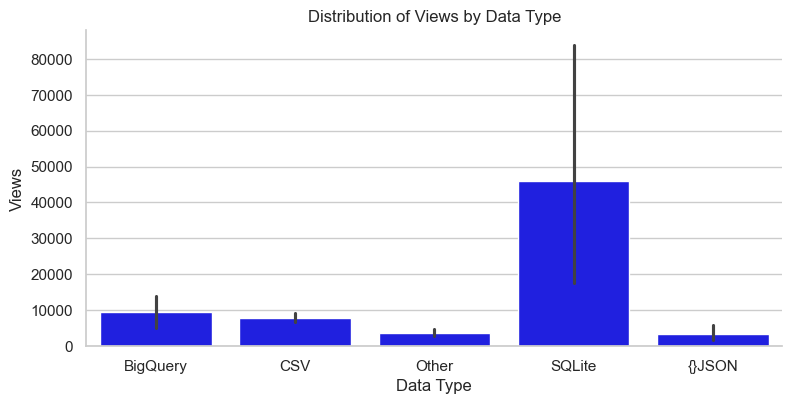

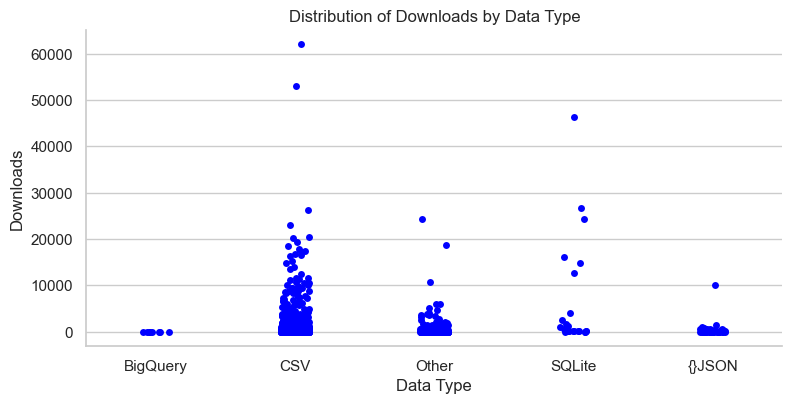

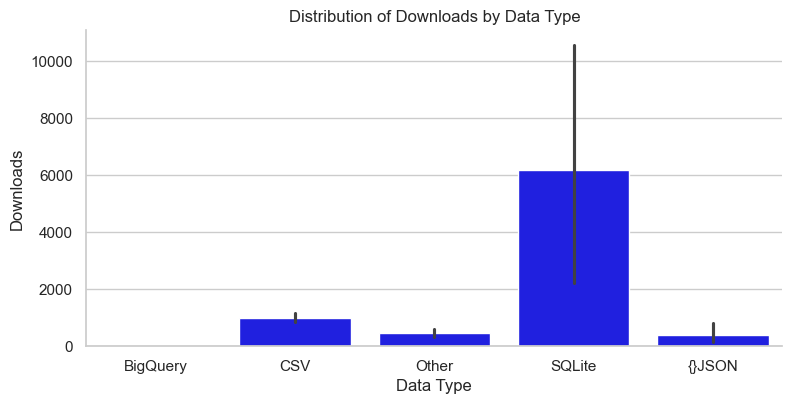

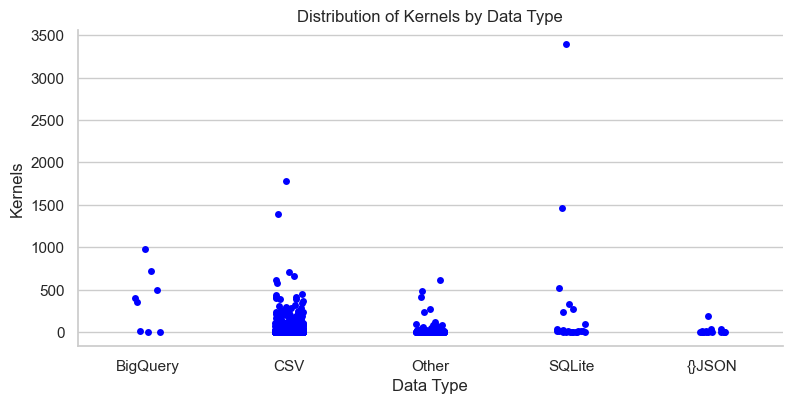

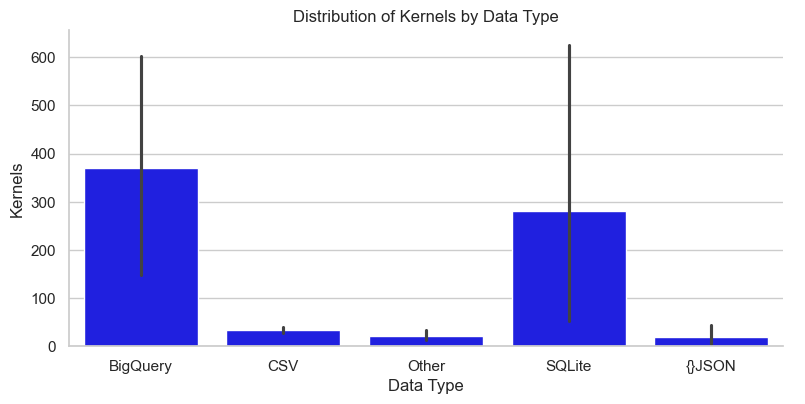

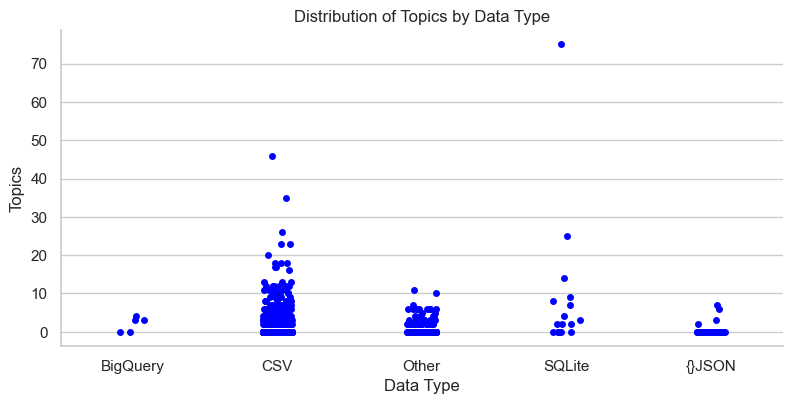

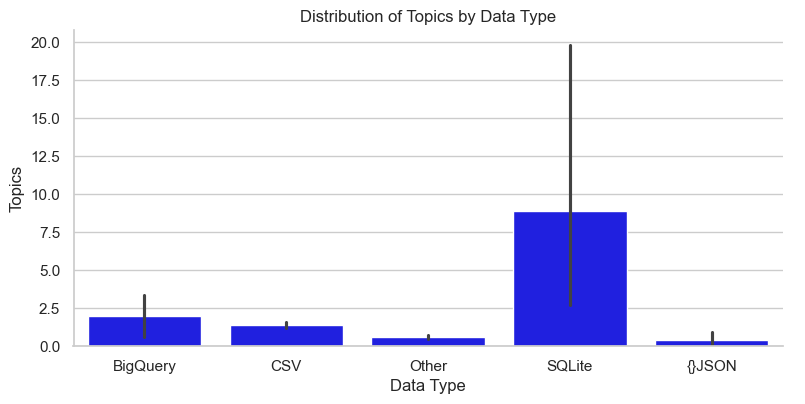

In [160]:
def plot_catplot(df, x_col, y_col):
    sns.catplot(data=df, x=x_col, y=y_col, height=4, aspect=2, color="blue")
    plt.title(f"Distribution of {y_col} by {x_col}")
    plt.show()

    sns.catplot(data=df, x=x_col, y=y_col, kind="bar", height=4, aspect=2, color="blue")
    plt.title(f"Distribution of {y_col} by {x_col}")
    plt.show()

numeric_columns = ["Votes", "Views", "Downloads", "Kernels", "Topics"]

for col in numeric_columns:
    plot_catplot(kaggle, "Data Type", col)